In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

In [2]:
M = 6 # number of pixels
K = 3 # number of labels
N = 64 # number of training data

In [3]:
true_mean = np.ones(M) - np.exp(np.random.normal(size=(M)))
true_gradients = np.exp(np.random.normal(size=(K, M)))

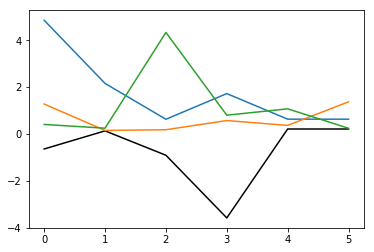

In [4]:
plt.plot(true_mean, color="k")
plt.plot(true_gradients.T)

In [5]:
shear = np.array([256, -8, 4]) * np.random.normal(size=(K, K))
true_labels = np.dot(shear, np.random.normal(size=(K, N))).T

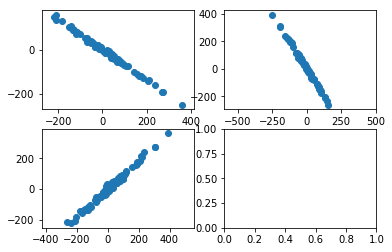

In [6]:
plt.clf()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
axs = [ax1, ax2, ax3, ax4]
for k in range(K):
    axs[k].scatter(true_labels[:,k], true_labels[:,(k + 1) % K])
    axs[k].axis("equal")

In [7]:
fake_data = true_mean[None,:] + np.dot(true_gradients.T, true_labels.T).T
fake_data += 0.3 * np.random.normal(size=fake_data.shape) # add noise
fake_data.shape

(64, 6)

In [8]:
design_matrix = np.vstack((np.ones(N), true_labels.T))
design_matrix.shape

(4, 64)

In [9]:
inferred_mean = np.zeros_like(true_mean)
inferred_gradients = np.zeros_like(true_gradients)

In [10]:
ATA = np.dot(design_matrix, design_matrix.T)
for m in range(M):
    ATb = np.dot(design_matrix, fake_data[:,m])
    pars = np.linalg.solve(ATA, ATb)
    inferred_mean[m] = pars[0]
    inferred_gradients[:,m] = pars[1:]

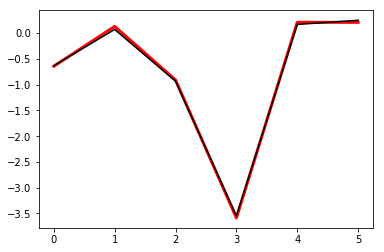

In [11]:
plt.clf()
plt.plot(true_mean, color="r", lw=3)
plt.plot(inferred_mean, color="k")

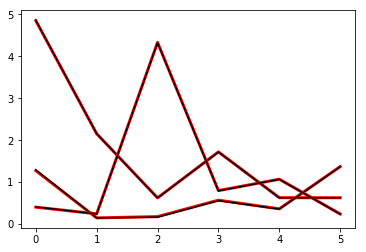

In [12]:
plt.clf()
for k in range (K):
    plt.plot(true_gradients[k], color="r", lw=3)
    plt.plot(inferred_gradients[k], color="k")